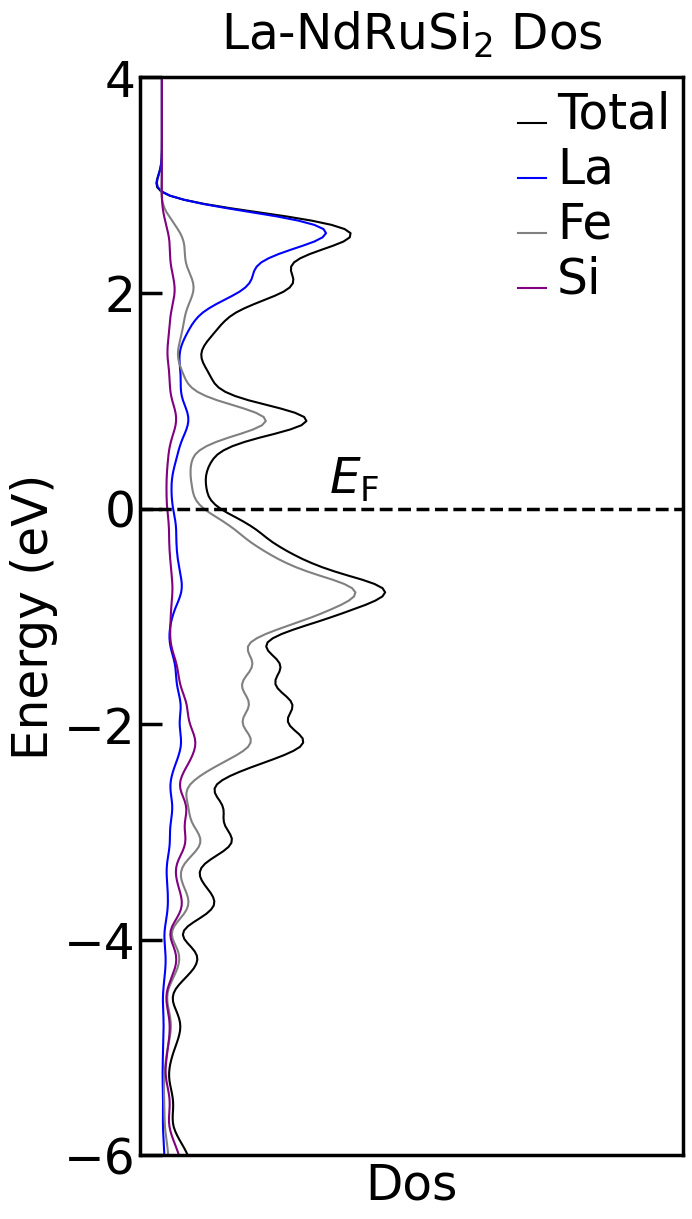

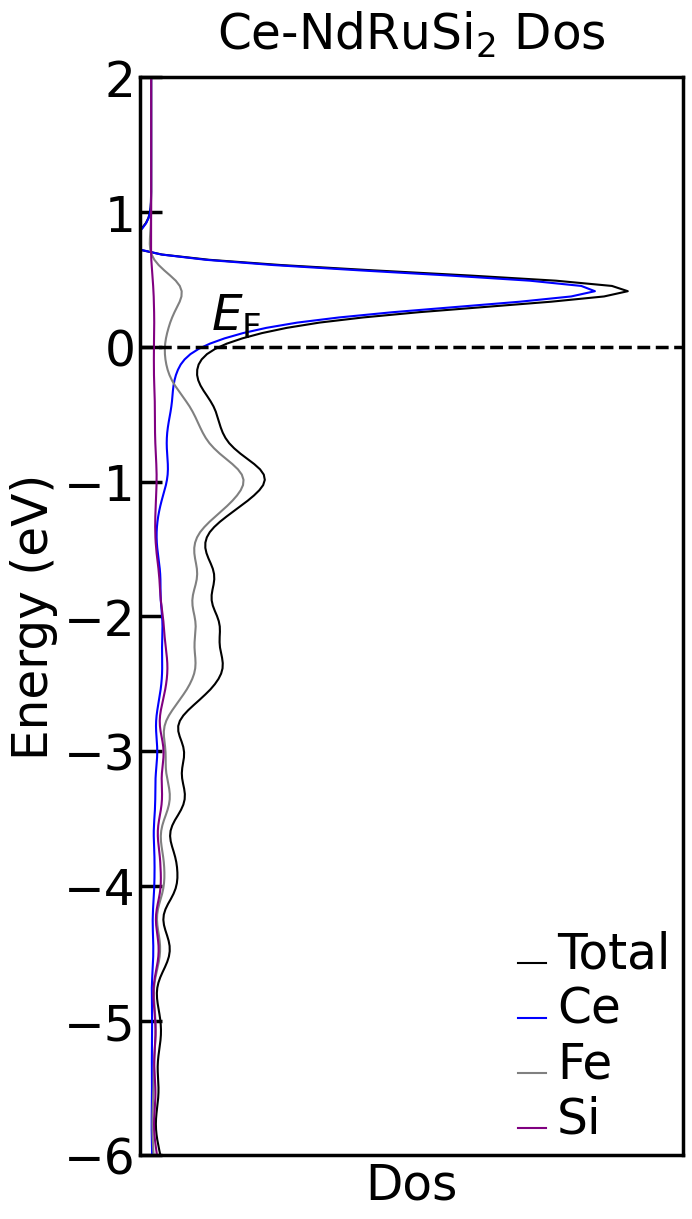

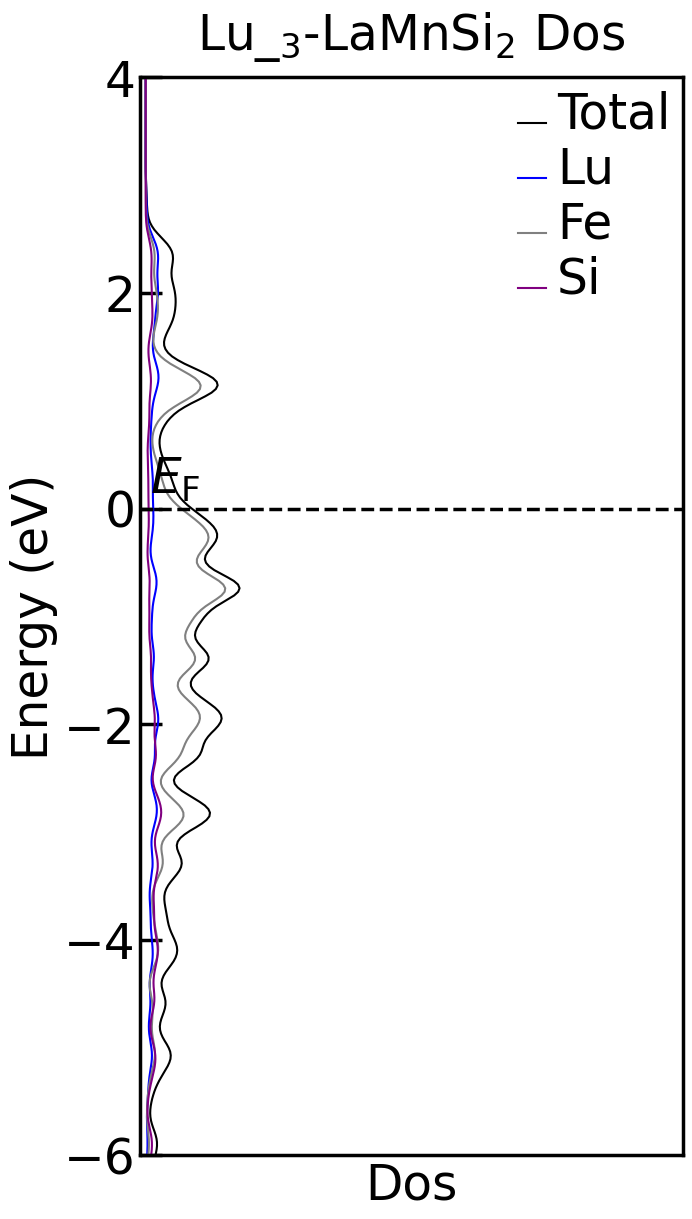

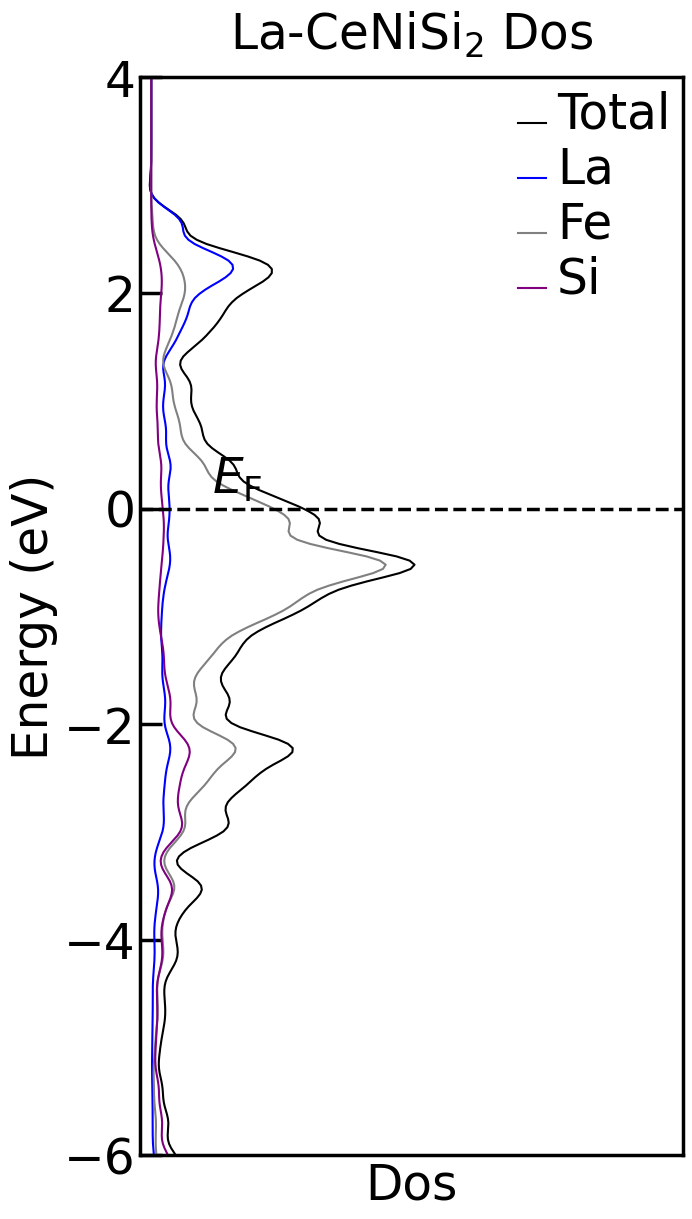

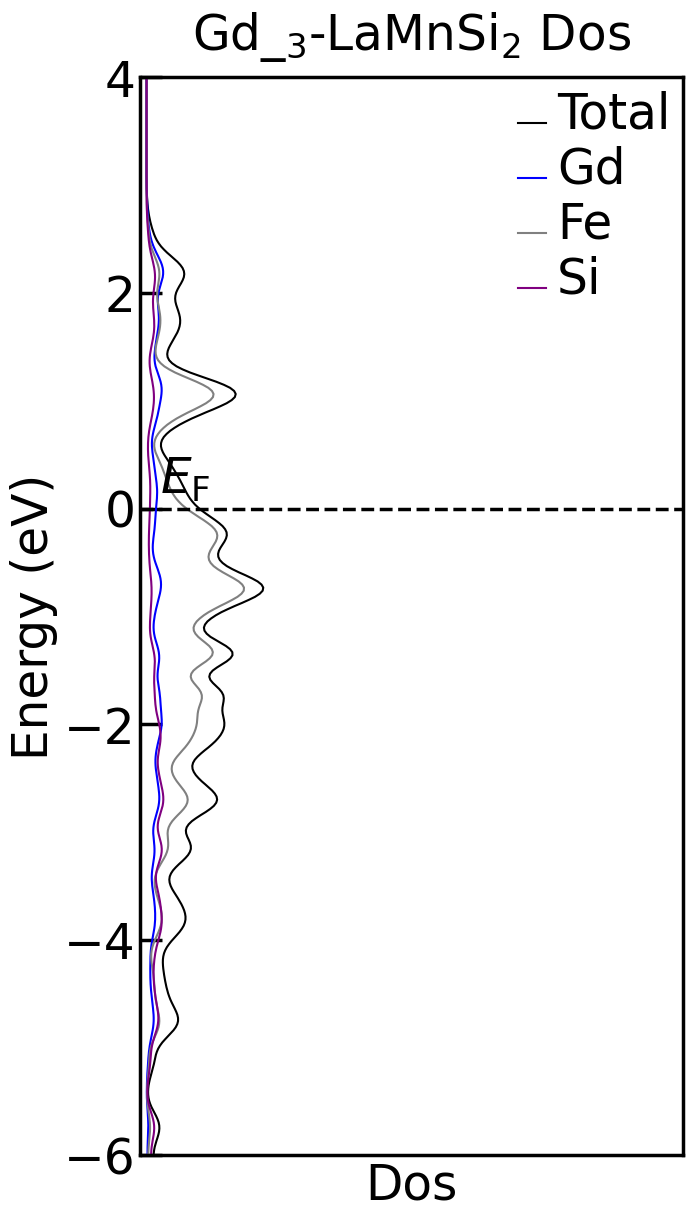

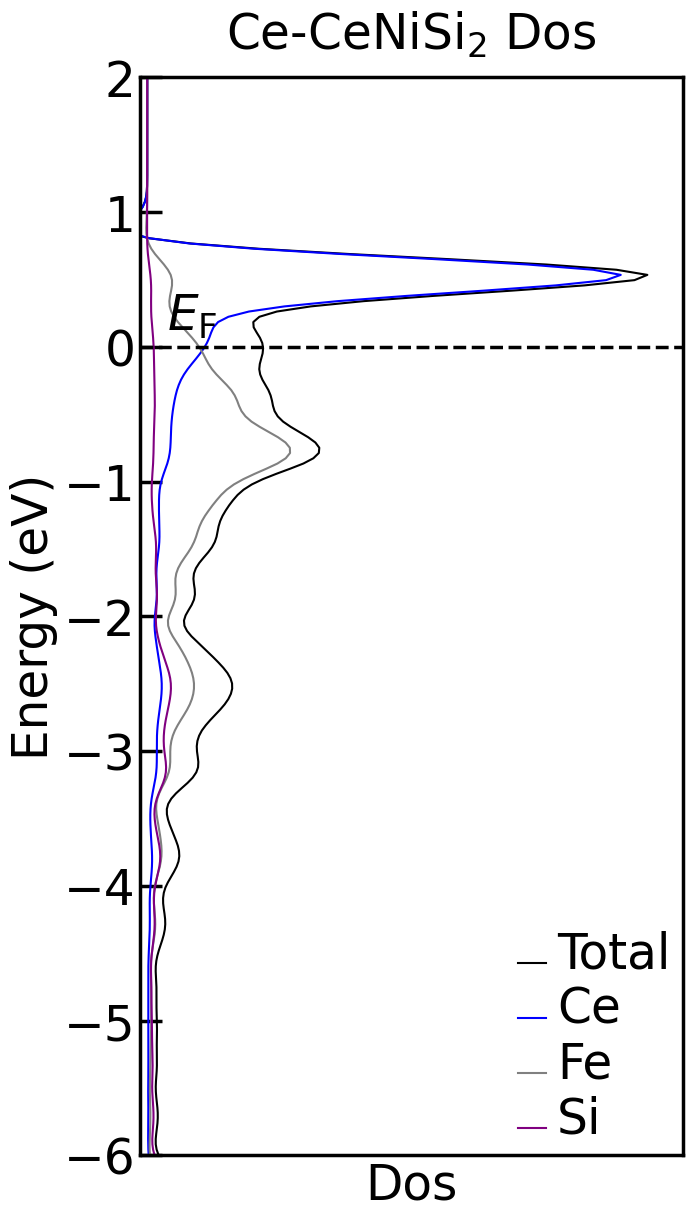

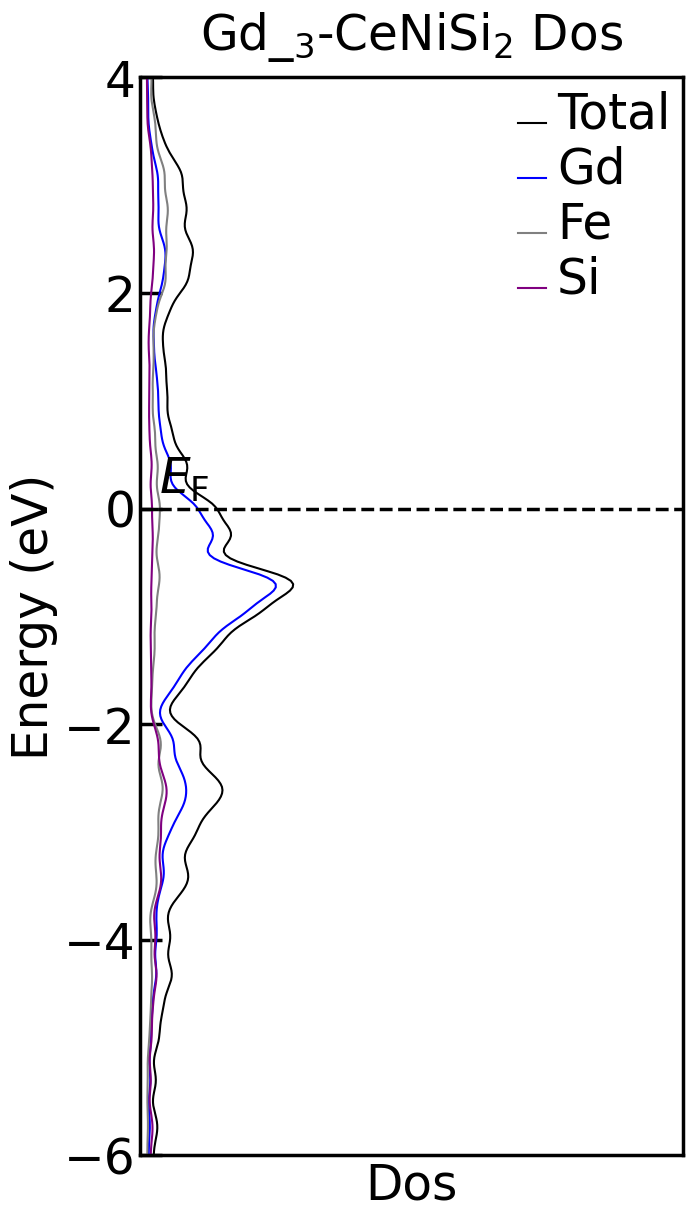

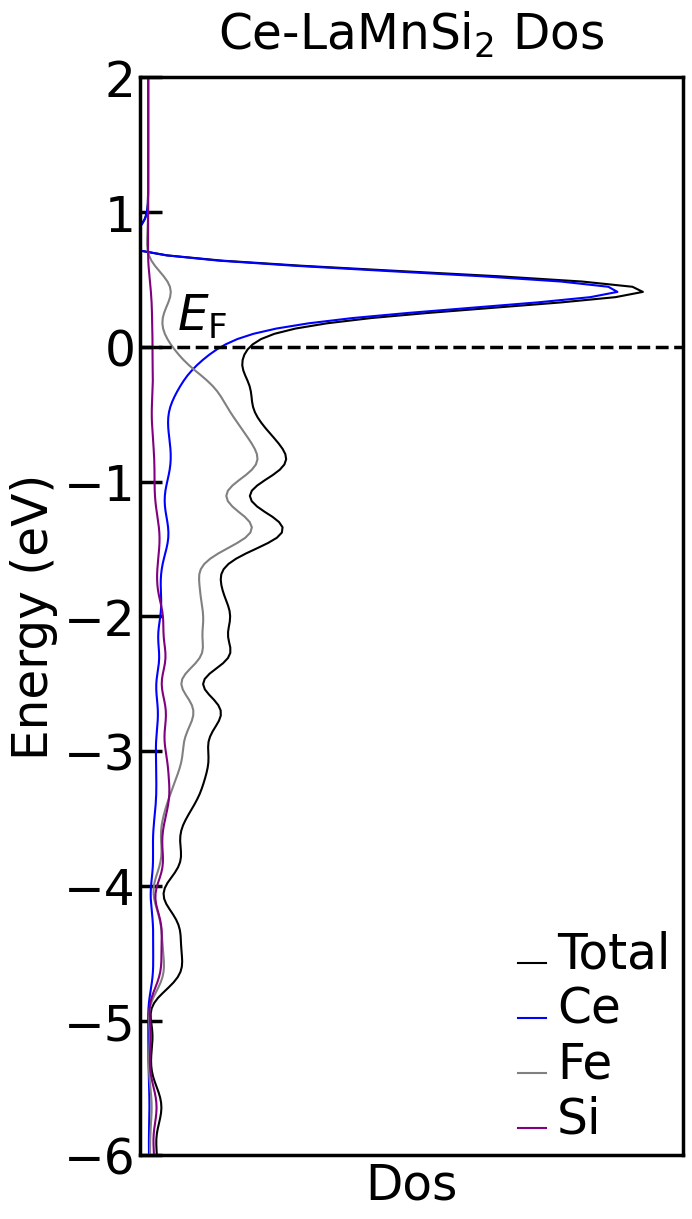

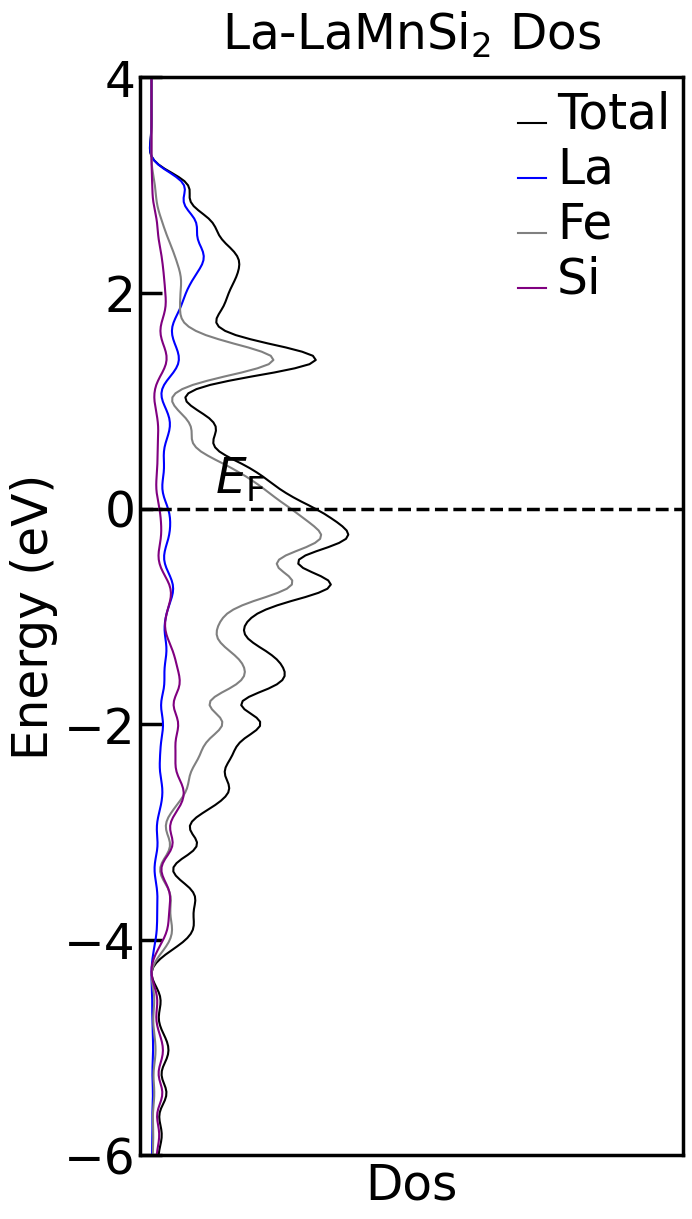

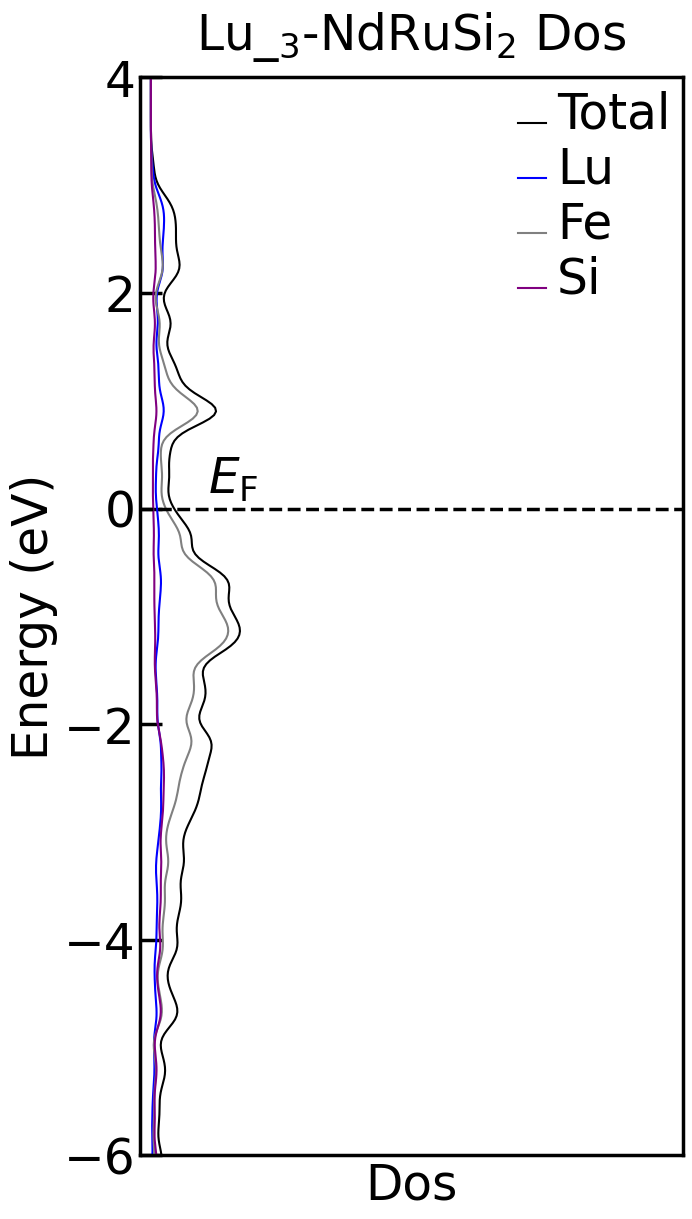

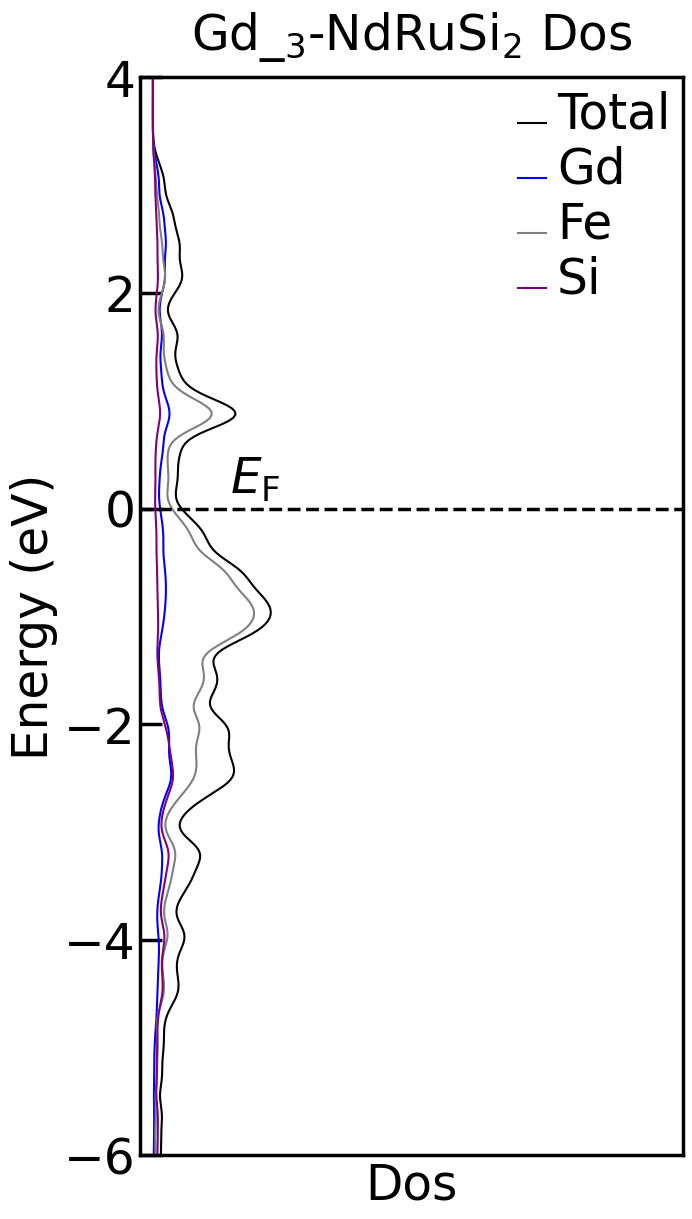

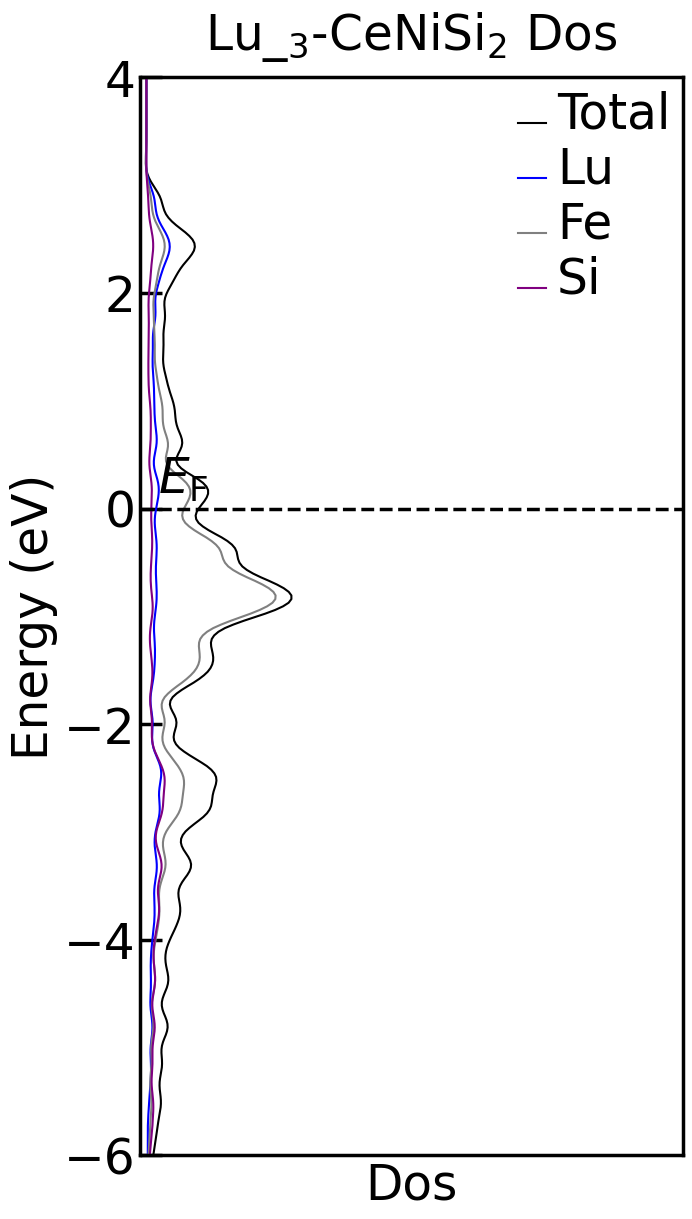

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import glob
import re  # Add import for regular expression

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
    "Ce-CeNiSi2_2": 8.40520204,
}

def plot_Dos_contributions(directory):
    Dos_files = get_Dos_files(directory)
    fig, ax = plt.subplots(figsize=(7, 14))  # Adjusted figure size
    
    max_x_value_within_y_frame = -np.inf  # Initialize max x-value within y-frame
    
    for i, filename in enumerate(Dos_files):
        # Check if filename contains '+'
        if '+' in filename:
            continue  # Skip plotting if filename contains '+'

        # Read data from file
        data = np.loadtxt(filename)
        
        # Split x and y values
        x = data[:, 0]
        y = data[:, 1]
        
        # Get file name without extension
        file_name = os.path.splitext(os.path.basename(filename))[0]
        
        # Get parent folder label
        parent_folder = os.path.basename(directory)
        
        # Subtract corresponding value from y-values
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]
        
        # Plot the data
        label = file_name.replace('Dos-', '')  # Remove 'Dos-' prefix from label
        
        # Assign colors based on element
        color = 'blue'  # Default color for most elements
        if 'Total' in label:
            color = 'black'  # Total DOS in black
        elif label in ["Fe", "FE"]:
            color = 'grey'  # Iron DOS in grey
        elif label in ["Si", "SI"]:
            color = 'purple'  # Silicon DOS in purple
        
        ax.plot(x, y, label=label, color=color)
        
        # Update max x-value within y-frame
        max_x_value_within_y_frame = max(max_x_value_within_y_frame, max(x[y >= ax.get_ylim()[0]]))

    # Use regular expression to find numbers and subscript them
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    folder_name_subscripted = folder_name_subscripted.replace('DOS', 'Dos')  # Replace "DOS" with "Dos"
    
    ax.set_xlabel('Dos', fontsize=35)  # Set font size for x-axis label
    ax.set_ylabel('Energy (eV)', fontsize=35)  # Set font size for y-axis label
    ax.set_title(folder_name_subscripted + ' Dos', fontsize=35, pad=20)  # Set font size for title and add padding
    
    # Set y-axis limits based on parent folder
    if parent_folder in ["Ce-NdRuSi2", "Ce-CeNiSi2", "Ce-LaMnSi2", "Ce-CeNiSi2_2"]:
        ax.set_ylim(-6, 2)  # Set the y-axis limits for specific parent folders
    else:
        ax.set_ylim(-6, 4)  # Default y-axis limits for other parent folders
    
    ax.set_xlim(-1, max_x_value_within_y_frame + 5)  # Set the adjusted x-axis limits
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Set line width to 3.2 for dashed line
    ax.text(10, 0.05, r'$E_{\mathrm{F}}$', fontsize=35, va='bottom', ha='right', color='black')  # Set font size for annotation text and italicize 'E'

    # Set font size for legend
    legend = ax.legend(frameon=False)  # Remove legend frame
    for text in legend.get_texts():
        text.set_fontsize(35)

    # Customize y-axis tick marks
    ax.tick_params(axis='y', direction='in', length=16, width=2.5, colors='black', which='both', labelsize=35)  # Set font size for tick labels and thicker ticks

    # Remove x-axis tick marks and labels
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Set axes lines width to 2.5
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/Element_Contributions/TDOS', folder_name + ".png")
    fig.savefig(output_filename)

def get_Dos_files(directory):
    # Use glob to find all files starting with "Dos-" in the specified directory
    Dos_files = glob.glob(os.path.join(directory, 'Dos-*'))
    # Filter out files containing '+'
    Dos_files.sort(key=lambda x: custom_order(os.path.basename(x)))
    return Dos_files

def custom_order(filename):
    # Define the custom order of Total, {RE: "Er", "Ce", "Eu", "Ho", "Pr", "Sm", "Dy", "Gd", "La", "Nd", "Tb"}, Fe, and Si
    order = {"Total": 0, "Er": 1, "Ce": 1, "Eu": 1, "Ho": 1, "Pr": 1, "Sm": 1, "Dy": 1, "Gd": 1, "La": 1, "Nd": 1, "Tb": 1, "Lu": 1, "Fe": 2, "Si": 3}
    # Extract the label from the filename
    label = filename.replace('Dos-', '').split('_')[0]
    # Return the corresponding order value
    return order.get(label, 999)

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2")

    for folder in os.listdir(structures_directory):
        directory = os.path.join(structures_directory, folder)
        if os.path.isdir(directory) and folder != 'Graphs':
            plot_Dos_contributions(directory)
